<a href="https://colab.research.google.com/github/RofiqAulia/PCVK_Ganjil_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

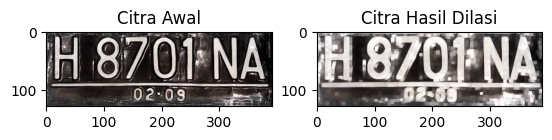

In [ ]:
# 3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk square 5 x 5
# tanpa menggunakan library morphology dari openCV

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg')

kernel = np.ones((5,5), np.uint8) # fungsi ones adalah untuk Membuat array dengan nilai 1, uint8 (unsigned integer 8 bit) merupakan tipe data yg digunakan untuk membuat gambar dengan menggunakan filter RGB dengan pixel dalam range [0,255].
dilation = cv2.dilate(img, kernel, iterations = 1) #iterator objek yang dapat diulangi, artinya Anda dapat melintasi semua nilai.
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal') #fungsi subplots() kita bisa menggambar banyak plot dalam satu gambar.
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

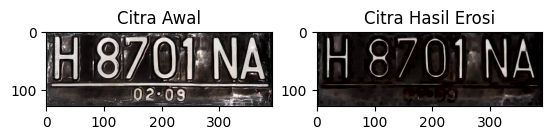

In [ ]:
# 4. fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5
# tanpa menggunakan library morphology dari openCV

kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

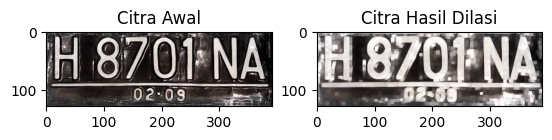

In [ ]:
# 5. implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk square 5 x 5
# dengan menggunakan library morphology dari openCV

kernel = np.ones((5,5), np.uint8)
dilation = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel) #morphologyEX berfungsi untuk menghilangkan noise,

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation), plt.title('Citra Hasil Dilasi')

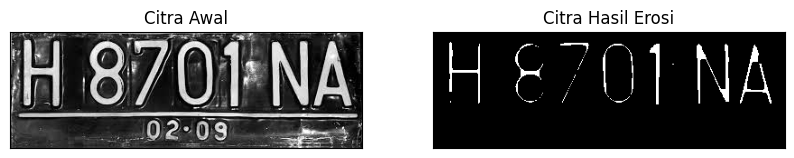

In [6]:
# 6. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

# Erosi Tanpa Library

# Fungsi untuk melakukan erosi
def erosi_citra(F, k):
    # Ukuran citra
    m, n = F.shape

    # Membuat elemen struktur erosi (SE) berbentuk square (k x k)
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2

    # Membuat output citra erosi
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            # Mengambil bagian citra sesuai dengan SE
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]

            # Operasi erosi: memilih nilai minimum dalam area SE
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Membaca gambar
img_e = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg', 0)

# Melakukan threshold untuk membuat gambar biner
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)

# Parameter erosi
k = 5
imgE = erosi_citra(thresh1, k)

# Menampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])

plt.show()

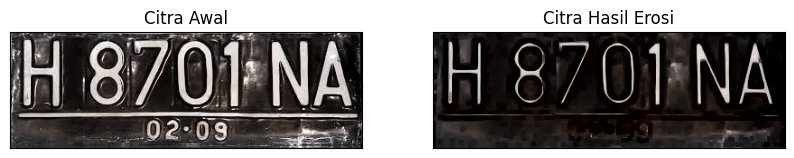

In [9]:
# 6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg')

# Membuat kernel untuk erosi
kernel = np.ones((5, 5), np.uint8)

# Melakukan operasi erosi pada citra
erosion = cv2.erode(img, kernel, iterations=1)

# Menampilkan citra asli dan hasil erosi
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img)
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(erosion)
plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])

plt.show()

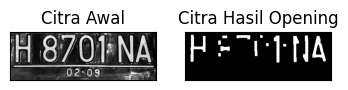

In [15]:
# 7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

# Membaca gambar dan melakukan threshold
img_o = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg', 0)
reto, thresho = cv2.threshold(img_o, 127, 225,
cv2.THRESH_BINARY)
k=7
imgO = dilasi_citra(erosi_citra(thresho,k),k)
plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

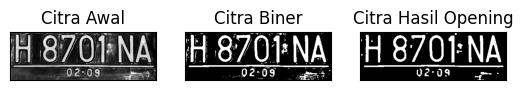

In [16]:
#Dengan Menggunakan Library
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])
plt.show()

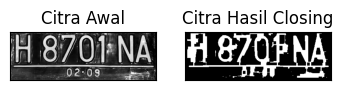

In [18]:
# 8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
# square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
# sehingga menghasilkan tampilan seperti di bawah ini:
# operasi closing tanpa library morphology

img_c= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg',0) #
retc, threshc = cv2.threshold(img_c, 127, 225,
cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc,k),k)
plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()

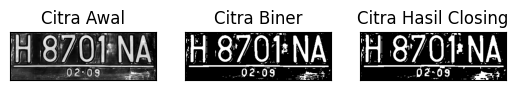

In [19]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

SED = Cross 3


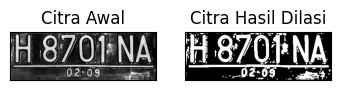

SED = Cross 5


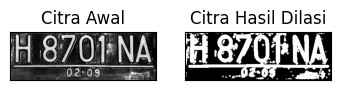

In [31]:
# # 9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
# Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:


#Dilasi Cross SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
  [1, 1, 1],
  [0, 1, 0]], dtype = np.uint8)

  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
        temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
        product= temp*SED
        imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

def dilasi_citra(F,w):
#size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
  [0, 0, 1, 0, 0],
  [1, 1, 1, 1, 1],
  [0, 0, 1, 0, 0],
  [0, 0, 1, 0, 0]], dtype = np.uint8)

  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
          temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
          product= temp*SED
          imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

SED = Circular 3


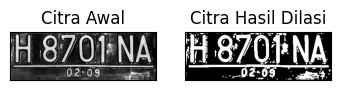

SED = Circle 5


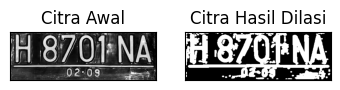

In [32]:
# 10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
# Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

#Dilasi Circular SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
        temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
        product= temp*SED
        imgD[i,j]= np.max(product)
  return imgD
print('SED = Circular 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()
print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

SE = Rectangle 3x5


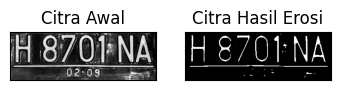

SE = Rectangle 5x7


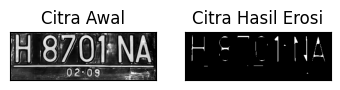

In [34]:
# 11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
# Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:

#Erosi Cross SE
def erosi_citra(F,p,l):
#size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjan
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
        temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
        product= temp*SE
        imgE[i,j]= np.min(product)
  return imgE
print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()
print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

SE = Line Vertikal 3


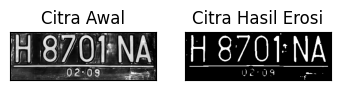

SE = Line Vertikal 5


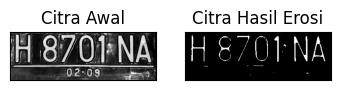

In [36]:
# 12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
# Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
# gambar j.png)

#Erosi Line Vertikal SE
def erosi_citra(F,k):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k))
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE
print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()
print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat_nomor.jpeg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

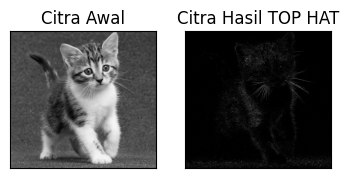

In [42]:
# 13 TopHat
# Getting the kernel to be used in Top-Hat
import cv2
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,
                                   filterSize)
# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
# Use the grayscale image stored in 'img' and cv2.MORPH_TOPHAT
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# Display the results
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

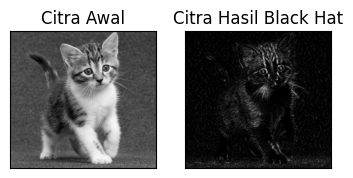

In [44]:
# 14 BLACKHAT
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Applying the Black-Hat operation
#tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

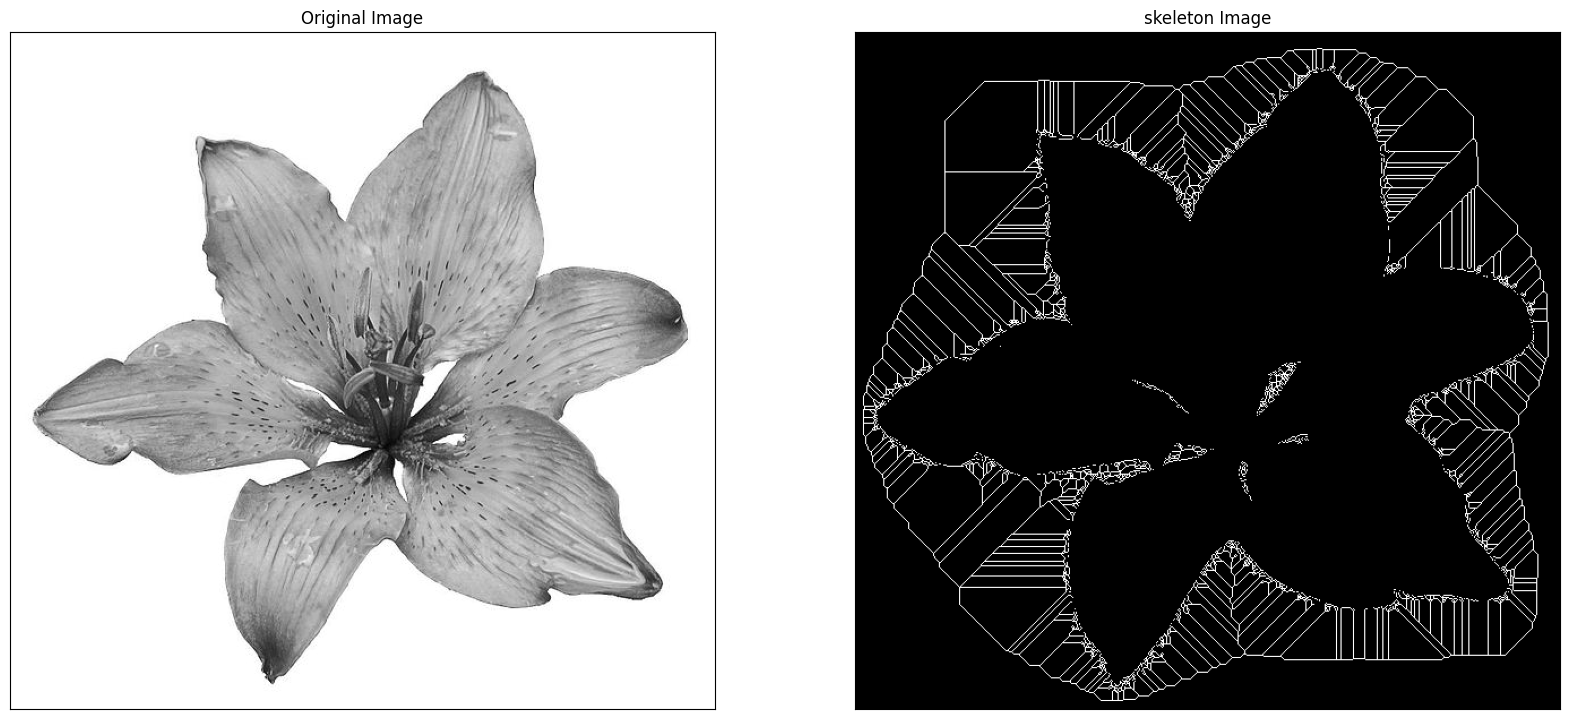

In [47]:
# 15. Skeleton
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg',0)

binary = img > filters.threshold_triangle(img)
# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0
# skeletonize image
skeleton = skeletonize(binary_cp)
# print images
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])
plt.savefig("binary and bin_skeleton.png")
plt.show()

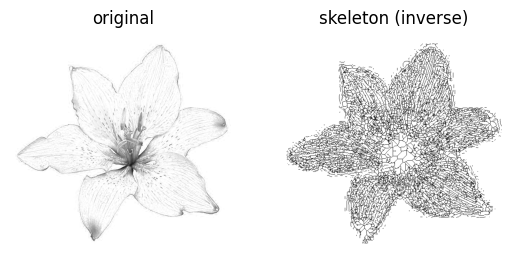

In [48]:
# 16. Skeleton Inverse

from skimage import io
from matplotlib import pyplot as plt
from skimage import filters

from skimage.morphology import skeletonize
# read image
img = io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')[...,
0]
# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)
# skeletonize image
skeleton = skeletonize(binary)
# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()
# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

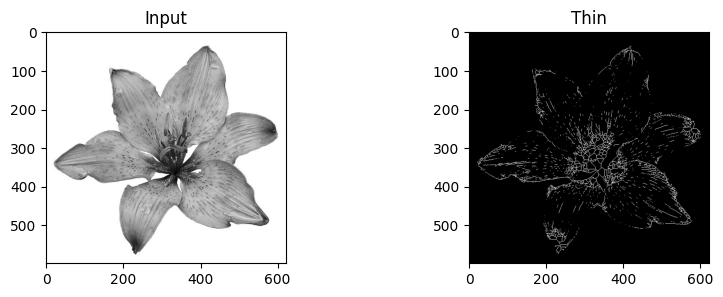

In [51]:
# 17. Thickening

from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.savefig('/tmp/char_out.png')
plt.show()

**TUGAS PRAKTIKUM MORFOLOGI**


TUGAS PRAKTIKUM MORFOLOGI
Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra tersebut.


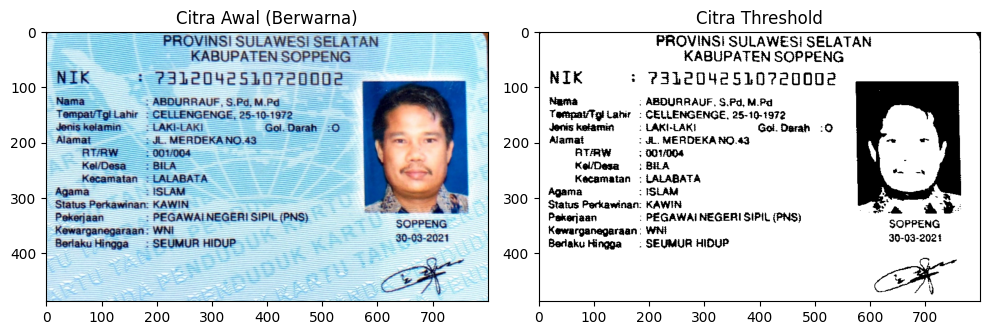

In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Muat citra KTP dalam format warna untuk ditampilkan
img_color = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP7.jpeg')  # Citra berwarna

# Check if image loading was successful
if img_color is None:
    print("Error: Could not read image file. Please check the file path and permissions.")
else:
    img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)  # Ubah dari BGR ke RGB

    # Muat citra KTP dalam format grayscale untuk pemrosesan
    img_gray = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP7.jpeg', 0)  # Citra grayscale
    _, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

    # Menampilkan citra berwarna dan citra threshold secara horizontal
    plt.figure(figsize=(10, 5))

    # Menampilkan citra berwarna
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Citra Awal (Berwarna)")

    # Menampilkan citra threshold
    plt.subplot(1, 2, 2)
    plt.imshow(thresh, cmap='gray')
    plt.title("Citra Threshold")

    plt.tight_layout()  # Mengatur layout agar rapi
    plt.show()

**DILASI**

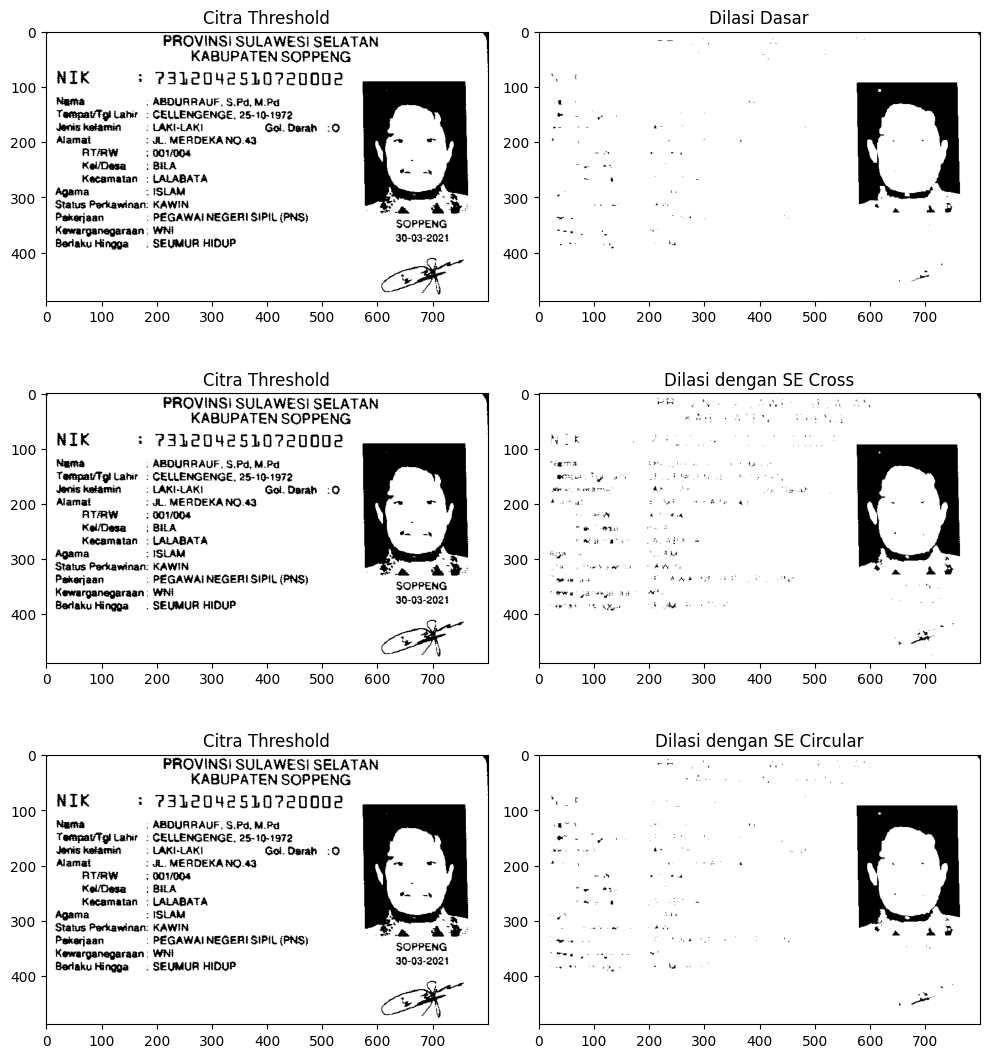

In [58]:
# Mengatur kernel untuk berbagai operasi dilasi
kernel = np.ones((5, 5), np.uint8)
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
kernel_circular = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Melakukan dilasi
dilated = cv2.dilate(thresh, kernel, iterations=1)
dilated_cross = cv2.dilate(thresh, kernel_cross, iterations=1)
dilated_circular = cv2.dilate(thresh, kernel_circular, iterations=1)

# Menampilkan hasil
plt.figure(figsize=(10, 11))

# Menampilkan citra threshold dan hasil dilasi dasar
plt.subplot(3, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title("Dilasi Dasar")

# Menampilkan citra threshold dan hasil dilasi dengan SE Cross
plt.subplot(3, 2, 3)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 4)
plt.imshow(dilated_cross, cmap='gray')
plt.title("Dilasi dengan SE Cross")

# Menampilkan citra threshold dan hasil dilasi dengan SE Circular
plt.subplot(3, 2, 5)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 6)
plt.imshow(dilated_circular, cmap='gray')
plt.title("Dilasi dengan SE Circular")

plt.tight_layout()  # Mengatur agar tampilan tidak bertumpuk
plt.show()

**EROSI**

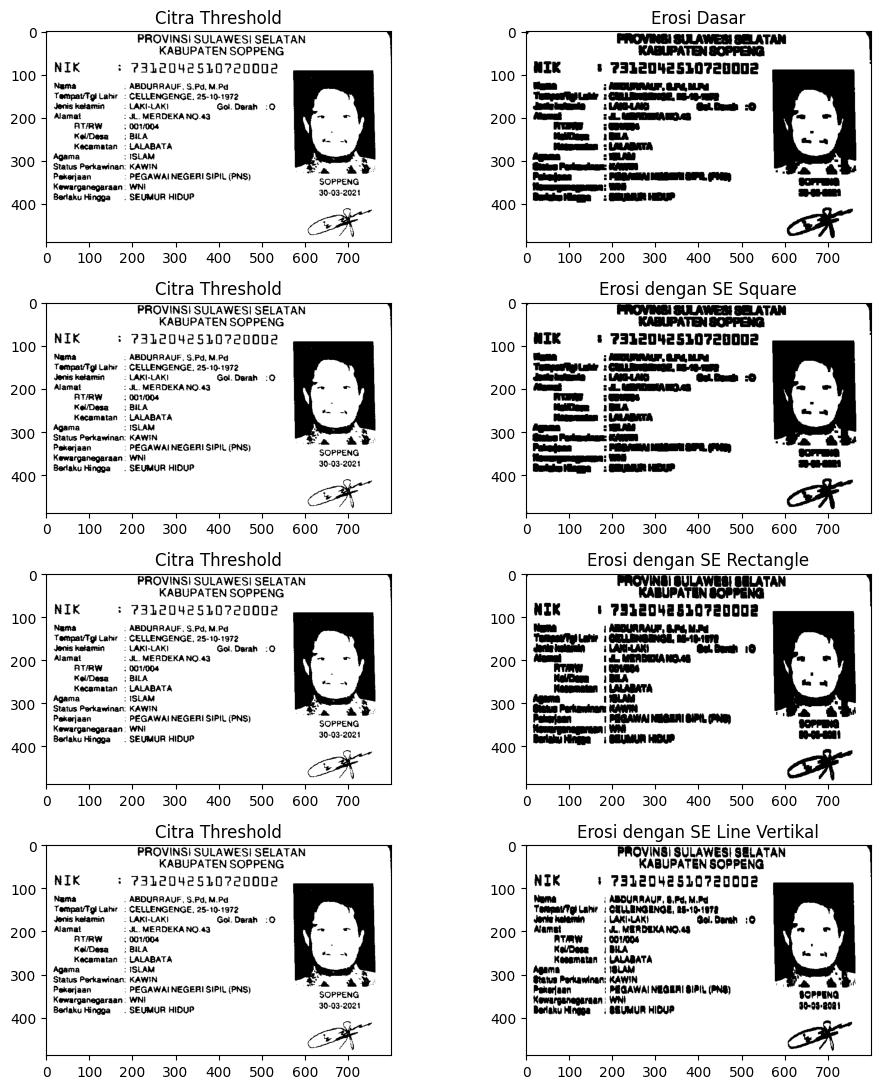

In [59]:
# Mengatur kernel untuk berbagai operasi erosi
kernel = np.ones((5, 5), np.uint8)  # Erosi dasar
kernel_square = np.ones((5, 5), np.uint8)  # Erosi dengan kernel square
kernel_rectangle = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 7))  # Erosi dengan kernel rectangle
kernel_line_vertical = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))  # Erosi dengan kernel line vertikal

# Melakukan erosi
eroded = cv2.erode(thresh, kernel, iterations=1)  # Erosi dasar
eroded_square = cv2.erode(thresh, kernel_square, iterations=1)  # Erosi dengan kernel square
eroded_rectangle = cv2.erode(thresh, kernel_rectangle, iterations=1)  # Erosi dengan kernel rectangle
eroded_line_vertical = cv2.erode(thresh, kernel_line_vertical, iterations=1)  # Erosi dengan kernel line vertikal

# Menampilkan hasil erosi
plt.figure(figsize=(10, 11))

# Menampilkan citra threshold dan hasil erosi dasar
plt.subplot(4, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(4, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title("Erosi Dasar")

# Menampilkan citra threshold dan hasil erosi dengan kernel square
plt.subplot(4, 2, 3)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(4, 2, 4)
plt.imshow(eroded_square, cmap='gray')
plt.title("Erosi dengan SE Square")

# Menampilkan citra threshold dan hasil erosi dengan kernel rectangle
plt.subplot(4, 2, 5)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(4, 2, 6)
plt.imshow(eroded_rectangle, cmap='gray')
plt.title("Erosi dengan SE Rectangle")

# Menampilkan citra threshold dan hasil erosi dengan kernel line vertikal
plt.subplot(4, 2, 7)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(4, 2, 8)
plt.imshow(eroded_line_vertical, cmap='gray')
plt.title("Erosi dengan SE Line Vertikal")

plt.tight_layout()  # Mengatur agar tampilan tidak bertumpuk
plt.show()

**OPERASI OPENING**

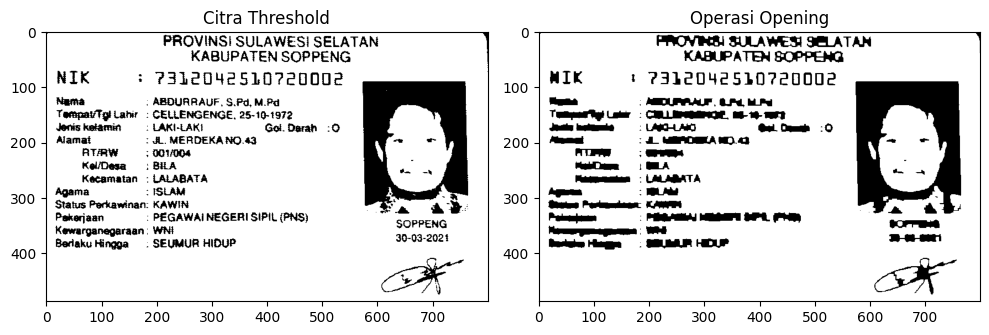

In [60]:
# Mengatur kernel untuk operasi Opening
kernel = np.ones((5, 5), np.uint8)

# Operasi Opening
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(opening, cmap='gray')
plt.title("Operasi Opening")

plt.tight_layout()
plt.show()


**Operasi Closing**

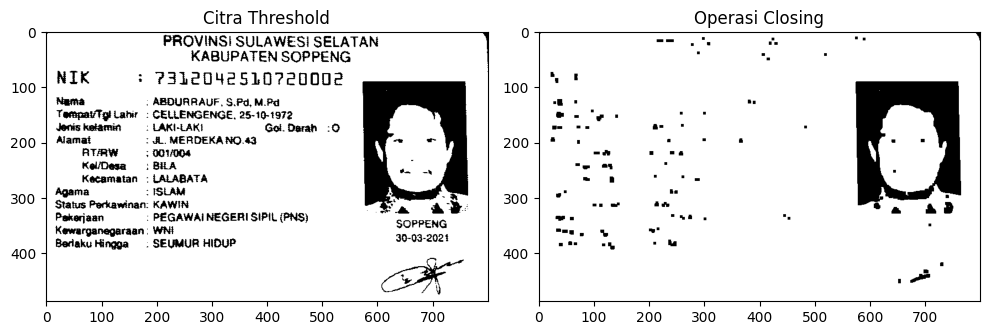

In [61]:
# Mengatur kernel untuk operasi Closing
kernel = np.ones((5, 5), np.uint8)

# Operasi Closing
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(closing, cmap='gray')
plt.title("Operasi Closing")

plt.tight_layout()
plt.show()

**Skeleton**

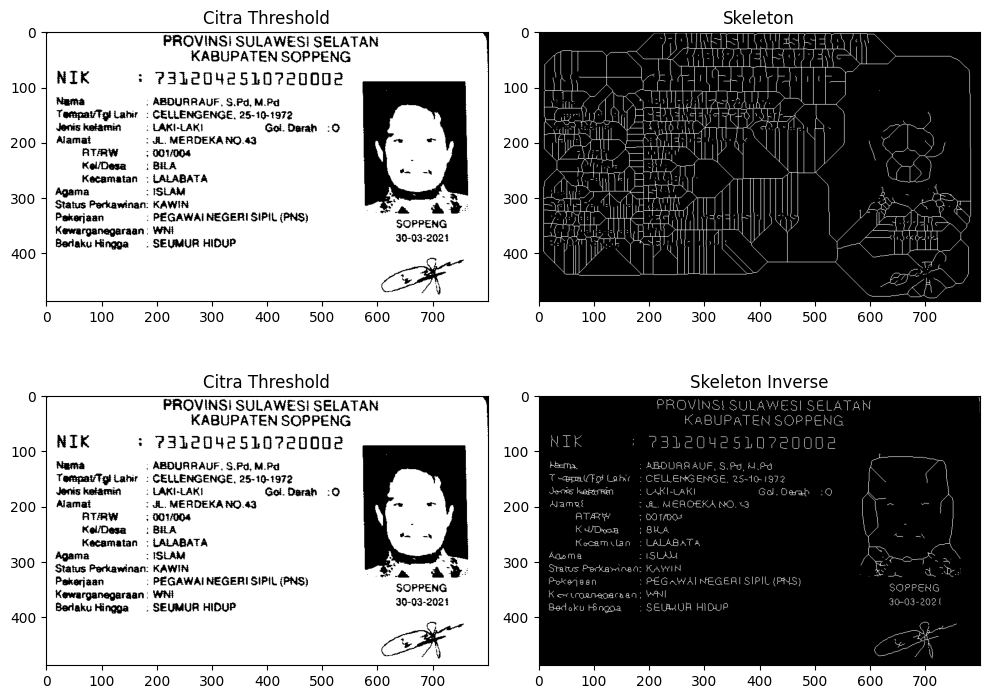

In [62]:
# Menghitung Skeleton
binary = thresh > 127  # Citra biner
skeleton = skeletonize(binary)
skeleton_inv = skeletonize(~binary)  # Inverse Skeleton

# Menampilkan hasil
plt.figure(figsize=(10, 11))

# Menampilkan citra threshold
plt.subplot(3, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 2)
plt.imshow(skeleton, cmap='gray')
plt.title("Skeleton")

# Menampilkan citra threshold untuk Skeleton Inverse
plt.subplot(3, 2, 3)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 4)
plt.imshow(skeleton_inv, cmap='gray')
plt.title("Skeleton Inverse")

plt.tight_layout()  # Mengatur agar tampilan tidak bertumpuk
plt.show()


**TopHat**

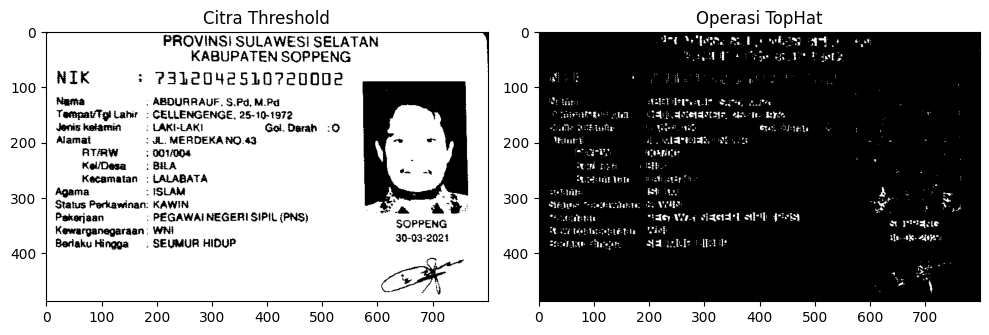

In [63]:
# Mengatur kernel untuk operasi TopHat
kernel = np.ones((5, 5), np.uint8)

# Operasi TopHat
tophat = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(tophat, cmap='gray')
plt.title("Operasi TopHat")

plt.tight_layout()
plt.show()

**BlackHat**

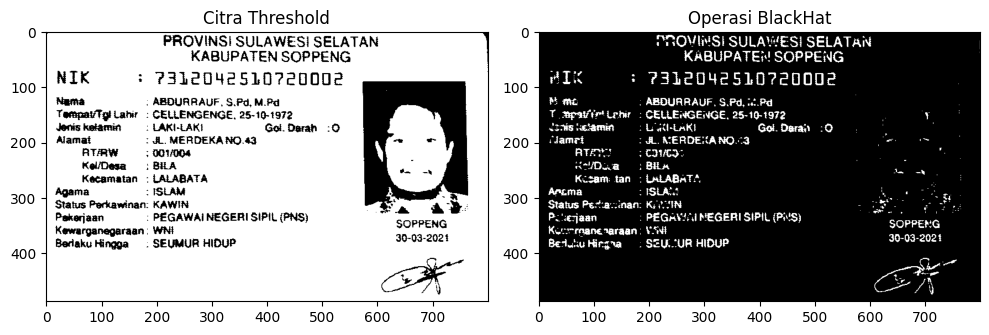

In [64]:
# Mengatur kernel untuk operasi BlackHat
kernel = np.ones((5, 5), np.uint8)

# Operasi BlackHat
blackhat = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(blackhat, cmap='gray')
plt.title("Operasi BlackHat")

plt.tight_layout()
plt.show()

**Thickening**

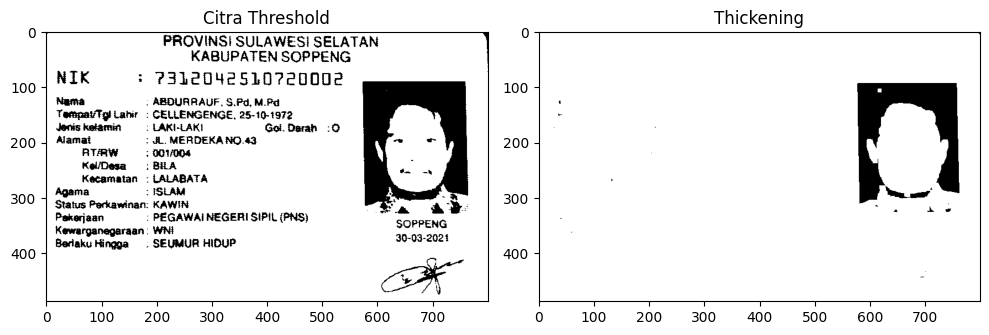

In [65]:
# Operasi Thickening menggunakan dilasi berulang
kernel = np.ones((3, 3), np.uint8)
thickened = cv2.dilate(thresh, kernel, iterations=3)  # Dilasi berulang

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(thickened, cmap='gray')
plt.title("Thickening")

plt.tight_layout()
plt.show()